In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rf

df=pd.read_csv('test2_modify.csv')

label='IsCanceled'
features=['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'RA_Canged',
       'RA_Changed', 'car_yes']
#train, test split
train, test= df[0::2], df[1::2]
train, test=train.reset_index() , test.reset_index()

x_train, y_train=train[features], train[label]
x_test, y_test=test[features], test[label]

model=rf()
model.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
for_plot=pd.DataFrame()
for_plot['predict']=model.predict(x_test)
for_plot['actual']=y_test
for_plot

,predict,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
20025,0,0
20026,0,0
20027,0,0
20028,0,0


# 혼동행렬(Confusion Matrix)의 지표
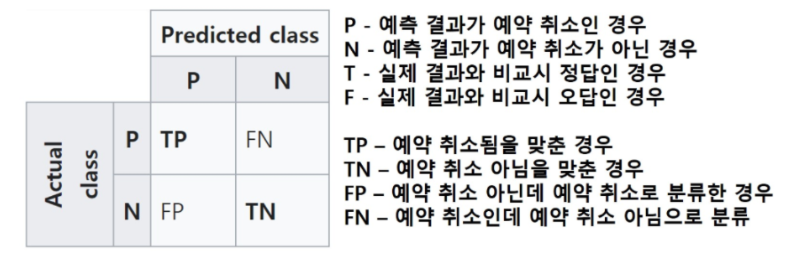

## 자주 사용하는 분류문제의 평가지표
1. accuracy(정확도)
- 전체 중 맞춘 비율
> acc=(TP+TN) / (TP+TN+FP+FN)

2. precision 
- True라고 분류한것 중 진짜 P 인것
> TP/(TP+FP)
3. recall
- 실제로 TPFL실제값이 p인 모델이 T라고 예측한 비율
> recall=TP/(TP+FN)
ex) 실제 날씨가 맑은 날 중 모델이 맑다고 예측한 비율
(정답의 입장에서 본 것)
- sensitivity, hit rate
4. fall-out
- 실제값이 F 인 데이터 중에서 모델이 P라고 예측한 비율 -> 잘못 예측한 비율


### 언제 accuracy 대신 prec와 recall 이 고려될까?
- class 불균형 문제가 발생할 때(ex)경계 불분명) -> accuracy의 의미가 사라짐
> class inbalnce issue

### prec, recall 차이
- TF는 예측의 맞고 틀림
- PN은 예측 내용
- ex) FT화재경보(PN불이 남 : 1, 안남 :0)
- FP 화재경보 x 불 남, FN 화재경보 x 불 남
> 둘다 틀림 but 경중의 차이가 큼 -> FN에 중점
<br><br>
- ex)스팸메일 분류(스팸: 1)
> 스팸이 아닌데 스팸으로 판단 -> FP에 중점

- ex)환자 검진(병:1)
> 병이 있는데 없다고 판단(FN)
- ex)금융사기 탐지(사기:1)
> 사기인데 아니라고 판단(FN) 
>FP
- ex)게임 어뷰저 분류(어뷰저(게임 불법 사용자):1)
> 어뷰저인데 아니라고 판단(FN)
> 어뷰저가 아닌데 어뷰저라고 판단(FP)
> 둘다 문제이지 않을까?

In [11]:
from sklearn.metrics import confusion_matrix as cm

TN, FP, FN, TP=cm(for_plot['actual'], for_plot['predict']).ravel()
print(TN, FP, FN, TP)

13477 961 2099 3493


In [12]:
acc=(TP+TN) / (TP+TN+FP+FN)
prec=TP/(TP+FP)
recall=TP/(TP+FN)
print(acc, prec, recall)

0.8472291562656016 0.7842388863942523 0.6246423462088698


# ROC_Curve
- 분류 모형 성능을 시각화
- recall-fallout의 변화를 시각화
- 곡선 아래의 면적을 AUC(Area Under Curve)


In [13]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
#rf는 대표적인 배깅 방식
from sklearn.ensemble import GradientBoostingClassifier as gb

In [14]:
m1, m2, m3=dt(), rf(), gb()
m1.fit(x_train, y_train)
m2.fit(x_train, y_train)
m3.fit(x_train, y_train)

GradientBoostingClassifier()

In [15]:
m2.predict_proba(x_test)
#예측을 확신하는 정도
#decisionTree는 100퍼 확신함

array([[0.79      , 0.21      ],
       [0.60666667, 0.39333333],
       [0.88      , 0.12      ],
       ...,
       [0.73      , 0.27      ],
       [0.63      , 0.37      ],
       [0.82      , 0.18      ]])

In [16]:
r1=pd.DataFrame(m1.predict_proba(x_test), columns=['neg', 'pos'])
r2=pd.DataFrame(m2.predict_proba(x_test), columns=['neg', 'pos'])
r3=pd.DataFrame(m3.predict_proba(x_test), columns=['neg', 'pos'])

In [17]:
r1

,neg,pos
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
20025,1.0,0.0
20026,1.0,0.0
20027,1.0,0.0
20028,0.0,1.0


In [18]:
r2

,neg,pos
0,0.790000,0.210000
1,0.606667,0.393333
2,0.880000,0.120000
3,0.800000,0.200000
4,0.430000,0.570000
...,...,...
20025,0.870000,0.130000
20026,0.820000,0.180000
20027,0.730000,0.270000
20028,0.630000,0.370000


In [19]:
r3

,neg,pos
0,0.748732,0.251268
1,0.694081,0.305919
2,0.779773,0.220227
3,0.846588,0.153412
4,0.556908,0.443092
...,...,...
20025,0.834499,0.165501
20026,0.717346,0.282654
20027,0.762976,0.237024
20028,0.747882,0.252118


In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
x1, y1, _=roc_curve(y_test, r1['pos'])
print(x1)
print(y1)

[0.         0.14053193 0.14067045 0.14073971 0.14122455 0.1418479
 0.14295609 0.14323313 0.1442028  0.14454911 0.14524172 0.14544951
 0.14551877 0.14988226 0.15057487 0.15099044 0.15133675 0.15196011
 0.15286051 0.15313755 0.15327608 0.15424574 0.15611581 0.15694695
 0.15736252 0.15777809 0.15923258 0.16013298 1.        ]
[0.         0.63787554 0.6389485  0.64055794 0.64252504 0.64592275
 0.65075107 0.652897   0.65396996 0.65486409 0.65718884 0.65808298
 0.66058655 0.66595136 0.6675608  0.66863376 0.66934907 0.6702432
 0.67113734 0.67167382 0.67167382 0.67203147 0.67292561 0.67399857
 0.67471388 0.67507153 0.67560801 0.67560801 1.        ]


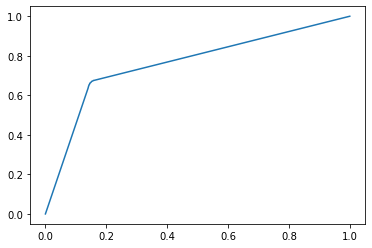

In [21]:
plt.plot(x1, y1, label='DecisionTree')

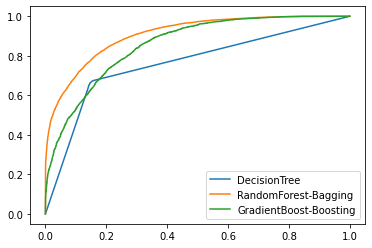

In [22]:
x2, y2, _=roc_curve(y_test, r2['pos'])
x3, y3, _=roc_curve(y_test, r3['pos'])
plt.plot(x1, y1, label='DecisionTree')
plt.plot(x2, y2, label='RandomForest-Bagging')
plt.plot(x3, y3, label='GradientBoost-Boosting')
plt.legend()
#성능 확인
#AUC가 넓을 수록 성능 좋음(Default일떄)
#

## ROC_Curve는 어떻게 그려질까
- 확신의 정도와 실제 정답을 이용해 y축을 recall, x축을 fall-out좌표로 이용
- 전부 truee라 예측하면 ? -> recall : 1.0, fall-out : 1.0->(1,1)좌표
- 전부 false라 예측하면 ? -> recall : 0.0, fall-out : 0.0->(0,0)좌표
- 판단기준(threshold)dmf 0~100%까지 조금씩 바꾸면서 그때마다 혼동행렬 획득 -> 평가지표 값을 산출
- ex) 판단기준을 0, 10, 20,....100%로 총11번 다르게 한다면? -> 혼동행렬도 11개 나옴
- 좌표평면에 점을 11개 찍을 수 있음 -> 이 점들의 집합이 ROC_Curve
- (기준이 0.1일때 10%이상만 확신이 있다면 P 로 예측)

# Hyperparameter- Tuning
- 알고리즘의 옵션을 조정해(튜닝) 성능을 튜닝하는 방법
- 최적의 옵션 값을 찾아 알고리즘 성능을 극대화시키는 방법



In [23]:
model=rf(max_depth=10, max_features=0.9)#함수의 default값을 수정해 더 나은 성능 기대할수 있음
model.fit(x_train, y_train)

for_plot['predict']=model.predict(x_test)
for_plot['actual']=y_test
TN, FP, FN, TP=cm(for_plot['actual'], for_plot['predict']).ravel()
recall=TP/(TP+FN)
print(recall)


0.46012160228898424


In [24]:
def scorer(model):
    model.fit(x_train, y_train)
    for_plot=pd.DataFrame()
    for_plot['predict']=model.predict(x_test)
    for_plot['actual']=y_test
    TN, FP, FN, TP=cm(for_plot['actual'], for_plot['predict']).ravel()
    recall=TP/(TP+FN)
    return recall

In [25]:
model=rf(max_depth=7, max_features=0.6)
scorer(model)

0.40182403433476394

### 접근법 3가지
- Grid-Search : 등고선에 격자모양을 그려서 점으로 찾기
    -거의 모든 조합으로 시도하기에 시간 오래걸림
- Random-Search : 무작위 조합으로(랜덤을 점을찍어) 찾음(넓은 범위->좁은범위)
    -소요시간 제어 가능
- Optimizer : 수학을 기반으로 함수의 정의역이 옵션, 치역을 평가지표로 두고 찾기


In [28]:
#Grid-Search

md_ls=[3,5,7,9,11,13,15,17]
mf_ls=[0.1,0.3,0.5,0.7,0.9]
all_scores=[]


for md in md_ls:
    for mf in mf_ls:
        model=rf(max_depth=md, max_features=mf, n_jobs=1)
        all_scores.append({'recall':scorer(model), 'md':md, 'mf':mf})
        
hyper_df=pd.DataFrame(all_scores)
hyper_df.sort_values(by='recall', ascending=False)

,recall,md,mf
39,0.610336,17,0.9
38,0.607296,17,0.7
37,0.599249,17,0.5
34,0.589413,15,0.9
36,0.583512,17,0.3
33,0.578684,15,0.7
32,0.575465,15,0.5
31,0.552217,15,0.3
29,0.547926,13,0.9
28,0.542918,13,0.7


In [30]:
import time


In [36]:
#Random-Search
target_time=5
t0=time.time()

while True:
    t1=time.time()-10
    if t1>target_time:
        break
    md=randint(15, 30)
    mf=randint(1, 999)/1000
    model=rf(max_depth=md, max_features=mf, n_jobs=1)
    all_scores.append({'recall':scorer(model), 'md':md, 'mf':mf})
        
hyper_df=pd.DataFrame(all_scores)
hyper_df.sort_values(by='recall', ascending=False)
    




,recall,md,mf
39,0.610336,17,0.9
38,0.607296,17,0.7
37,0.599249,17,0.5
34,0.589413,15,0.9
36,0.583512,17,0.3
33,0.578684,15,0.7
32,0.575465,15,0.5
31,0.552217,15,0.3
29,0.547926,13,0.9
28,0.542918,13,0.7


In [33]:
from random import randint

randint(1,999)/1000

0.381